In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools # for combinations
import statsmodels.api as sm # anova
from scipy import stats # significance levels, normality
from statsmodels.formula.api import ols
%matplotlib inline

In [22]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [23]:
# There are 44188 rows and 21 columns
print(df.shape)

(41188, 21)


In [24]:
# examine the common stats of numeric columns
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [25]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
# Examine data, there are some hidden columns
# show all columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [27]:
# loop through the data of each column, find the column has value of cell which is object =='?' then count
# There are 41188 rows and 21 columns
for col in df.columns:
    if df[col].dtype == object:
         print(col, df[col][df[col] == '?'].count())
df.shape

job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
poutcome 0
y 0


(41188, 21)

In [28]:
# Because there are many of hidden columns & hidden rows, to see the overview of dataframe
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
client_info = df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 14, 20]]
client_info['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

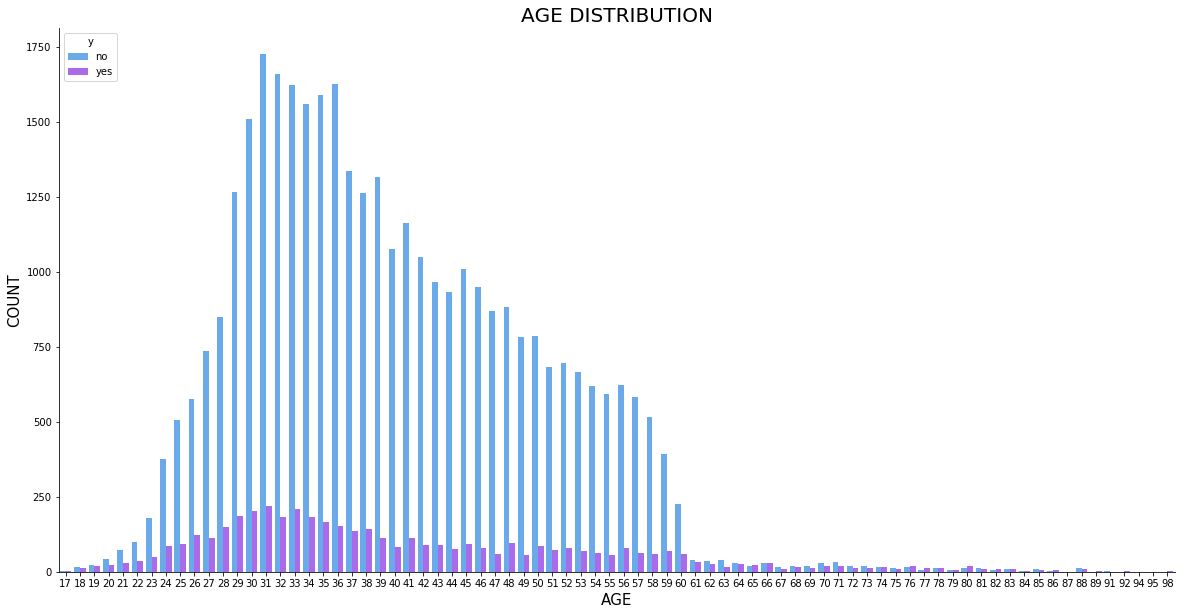

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'age', hue='y', data = client_info, palette='cool')
ax.set_title('AGE DISTRIBUTION', fontsize=20)
ax.set_xlabel('AGE', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
sns.despine()

In [31]:
client_job = client_info.groupby(['job', 'y']).count().iloc[:, 0:1]
client_job.columns = ['count']
client_job.T

job   admin.       blue-collar      entrepreneur      housemaid       \
y         no   yes          no  yes           no  yes        no  yes   
count   9070  1352        8616  638         1332  124       954  106   

job   management      retired      self-employed      services      student  \
y             no  yes      no  yes            no  yes       no  yes      no   
count       2596  328    1286  434          1272  149     3646  323     600   

job        technician      unemployed      unknown      
y      yes         no  yes         no  yes      no yes  
count  275       6013  730        870  144     293  37

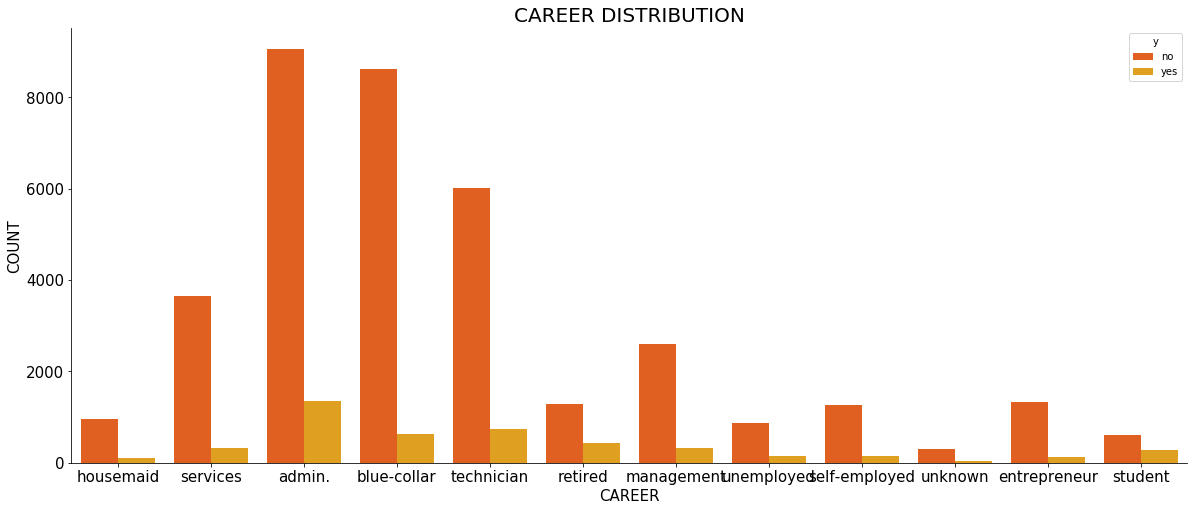

In [32]:
# OUT COME COUNT BASED ON JOB
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', hue='y', data = client_info, palette='autumn')
ax.set_xticklabels(client_info['job'].unique())
ax.set_xlabel('CAREER', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('CAREER DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

In [33]:
client_education = client_info.groupby(['education', 'y']).count().iloc[:, 0:1]
client_education.columns = ['count']
client_education.T

education basic.4y      basic.6y      basic.9y      high.school        \
y               no  yes       no  yes       no  yes          no   yes   
count         3748  428     2104  188     5572  473        8484  1031   

education illiterate     professional.course      university.degree        \
y                 no yes                  no  yes                no   yes   
count             14   4                4648  595             10498  1670   

education unknown       
y              no  yes  
count        1480  251

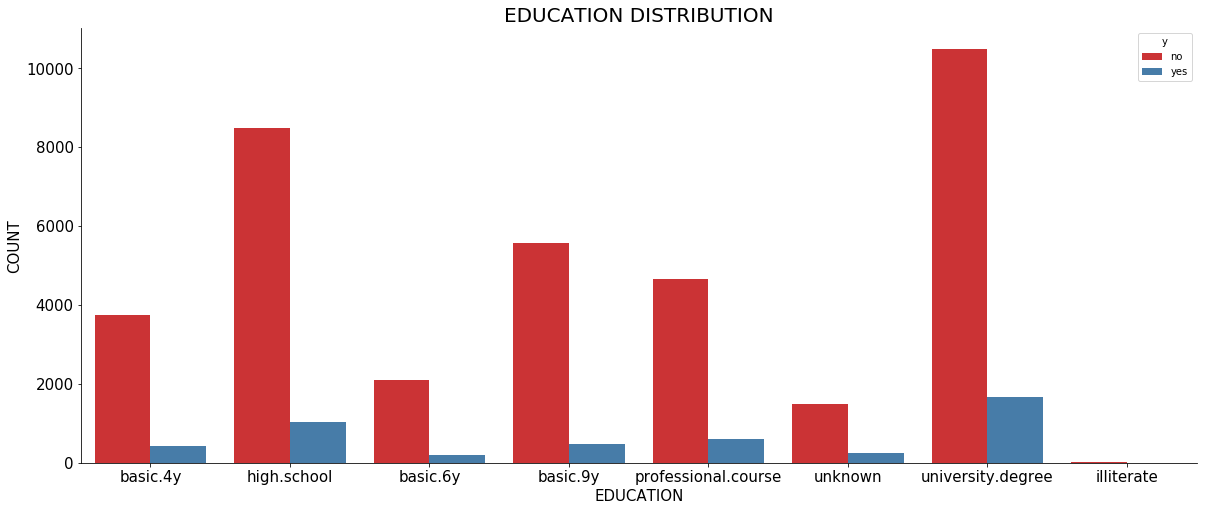

In [56]:
# OUT COME COUNT BASED ON EDUCATION
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', hue='y', data = client_info, palette='Set1')
ax.set_xticklabels(client_info['education'].unique())
ax.set_xlabel('EDUCATION', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('EDUCATION DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

In [35]:
client_marital = client_info.groupby(['marital', 'y']).count().iloc[:, 0:1]
client_marital.columns = ['count']
client_marital.T

marital divorced      married       single       unknown    
y             no  yes      no   yes     no   yes      no yes
count       4136  476   22396  2532   9948  1620      68  12

In [36]:
client_poutcome = client_info.groupby(['poutcome', 'y']).count().iloc[:, 0:1]
client_poutcome.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_poutcome.T

poutcome failure      nonexistent       success     
y             no  yes          no   yes      no  yes
count       3647  605       32422  3141     479  894

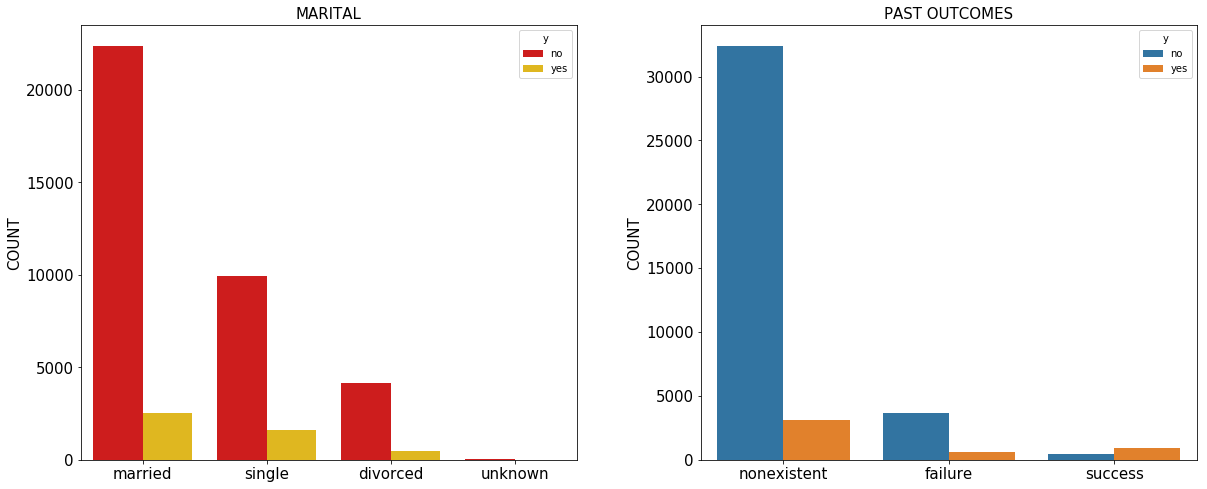

In [37]:
# MARITAL
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.countplot(x = 'marital', hue='y', data = client_info, ax = ax1, palette='hot')
ax1.set_title('MARITAL', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('COUNT', fontsize=15)
ax1.tick_params(labelsize=15)

# PAST OUTCOMES
sns.countplot(x = 'poutcome', hue='y', data = client_info, ax = ax2)
ax2.set_title('PAST OUTCOMES', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('COUNT', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [38]:
client_default = client_info.groupby(['default', 'y']).count().iloc[:, 0:1]
client_default.columns = ['count']
client_default.T

default     no       unknown      yes
y           no   yes      no  yes  no
count    28391  4197    8154  443   3

In [39]:
client_housing = client_info.groupby(['housing', 'y']).count().iloc[:, 0:1]
client_housing.columns = ['count']
client_housing.T

housing     no       unknown         yes      
y           no   yes      no  yes     no   yes
count    16596  2026     883  107  19069  2507

In [40]:
client_loan = client_info.groupby(['loan', 'y']).count().iloc[:, 0:1]
client_loan.columns = ['count']
client_loan.T

loan      no       unknown        yes     
y         no   yes      no  yes    no  yes
count  30100  3850     883  107  5565  683

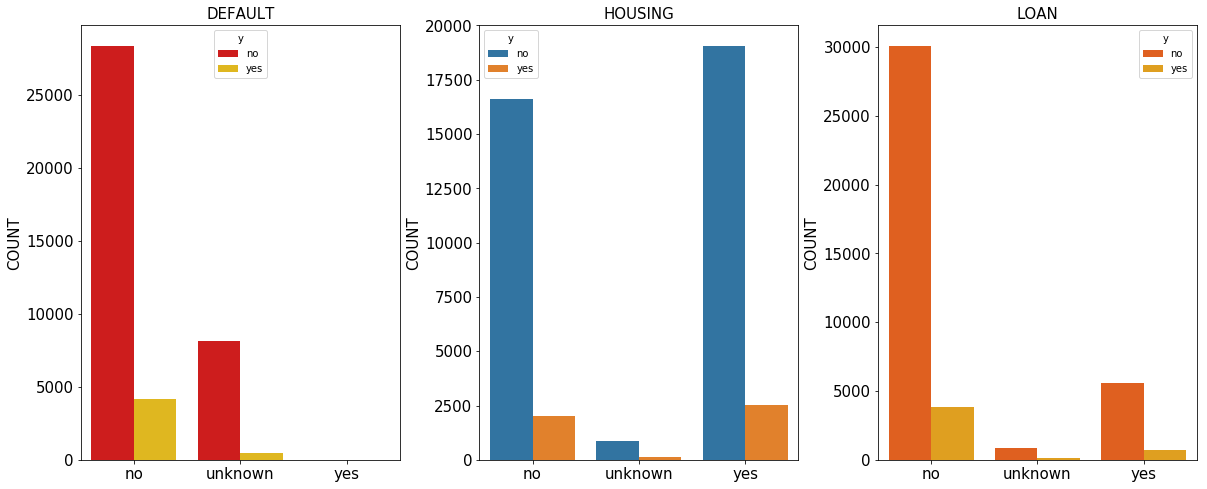

In [57]:
#DEFAULT
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', hue='y', data = client_info, ax = ax1, order = ['no', 'unknown', 'yes'], palette='hot')
ax1.set_title('DEFAULT', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('COUNT', fontsize=15)
ax1.tick_params(labelsize=15)

#HOUSING
sns.countplot(x = 'housing', hue='y', data = client_info, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('HOUSING', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('COUNT', fontsize=15)
ax2.tick_params(labelsize=15)

#LOAN
sns.countplot(x = 'loan', hue='y', data = client_info, ax = ax3, order = ['no', 'unknown', 'yes'], palette='autumn')
ax3.set_title('LOAN', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('COUNT', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

 #### We will focus to analysis on Housing & Loan

In [42]:
# Ho: There is no difference between the subcription outcomes of the Housing's types
# Ha: There is difference between the subcription outcomes of the Housing's types
alpha = 0.5
#Yes total Proportion :
total_YN = client_info.count().iloc[0]
total_Y = client_info.loc[client_info['y']=='yes'].count().iloc[0]
prop_total_Y = round(total_Y/total_YN, 4)

#proprotion_Y of each type in Housing(Yes, Unknown, No)
housing_type = list(client_info['housing'].unique())
prop_housing_types = []
for t in housing_type:
    housing_YN = client_info.loc[client_info['housing']==t].count().iloc[0]
    housing_Y = client_info.loc[(client_info['housing']==t) & (client_info['y']=='yes')].count().iloc[0]
    prop_housing_Y = round(housing_Y/housing_YN, 4)
    prop_housing_types.append(prop_housing_Y)
    
# P-value:
from scipy.stats import ttest_1samp
data = prop_housing_types
s, p = ttest_1samp(data,prop_total_Y)
p

0.5859985142287997

p > alpha => fail to reject the null hypothesis, that means there is no difference between the subcription outcomes of the Housing's types.

In [58]:
# Ho: There is no difference between the subcription outcomes of the Loan's types
# Ha: There is difference between the subcription outcomes of the Loan's types
alpha = 0.5
#Yes total Proportion :
total_YN = client_info.count().iloc[0]
total_Y = client_info.loc[client_info['y']=='yes'].count().iloc[0]
prop_total_Y = round(total_Y/total_YN, 4)


#proprotion_Y of each type in Loan(Yes, Unknown, No)
loan_type = list(client_info['loan'].unique())
prop_loan_types = []
for t in loan_type:
    loan_YN = client_info.loc[client_info['loan']==t].count().iloc[0]
    loan_Y = client_info.loc[(client_info['loan']==t) & (client_info['y']=='yes')].count().iloc[0]
    prop_loan_Y = round(loan_Y/loan_YN, 4)
    prop_loan_types.append(prop_loan_Y)
    
# P-value:
from scipy.stats import ttest_1samp
data = prop_loan_types
s, p = ttest_1samp(data,prop_total_Y)
p

0.26864574076975006

p < alpha , reject the null hypothesis, that means there is difference between the subcription outcomes of the Loan's types

In [43]:
client_day = client_info.groupby(['day_of_week', 'y']).count().iloc[:, 0:1]
client_day.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_day.T

day_of_week   fri        mon        thu         tue        wed     
y              no  yes    no  yes    no   yes    no  yes    no  yes
count        6981  846  7667  847  7578  1045  7137  953  7185  949

In [44]:
client_month = client_info.groupby(['month', 'y']).count().iloc[:, 0:1]
client_day.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_month.T

month   apr        aug      dec       jul        jun       mar         may  \
y        no  yes    no  yes  no yes    no  yes    no  yes   no  yes     no   
age    2093  539  5523  655  93  89  6525  649  4759  559  270  276  12883   

month        nov       oct       sep       
y      yes    no  yes   no  yes   no  yes  
age    886  3685  416  403  315  314  256

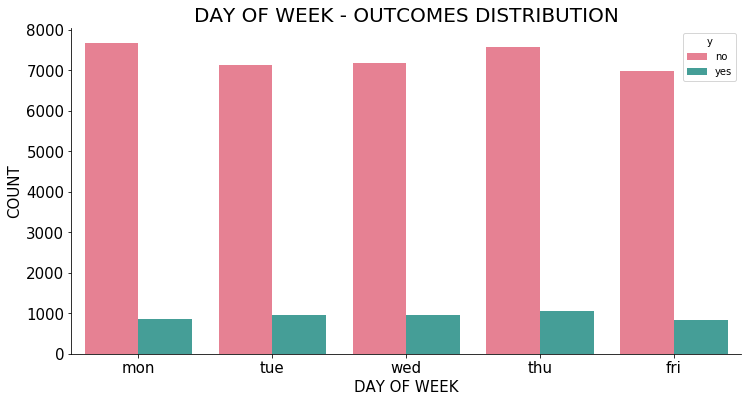

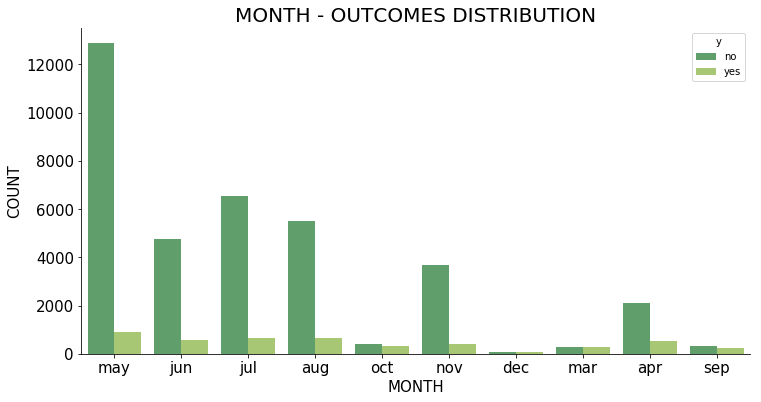

In [45]:
# OUT COME COUNT BASED ON DAY_OF_WEEK
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.countplot(x = 'day_of_week', hue='y', data = client_info, palette='husl')
#ax.set_xticklabels(client_info['poutcome'].unique(), rotation=30)
ax.set_xlabel('DAY OF WEEK', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('DAY OF WEEK - OUTCOMES DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

# OUT COME COUNT BASED ON MONTH
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.countplot(x = 'month', hue='y', data = client_info, palette='summer')
ax.set_xlabel('MONTH', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('MONTH - OUTCOMES DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

##### By observation, obviously we can see the day of week does not significantly affect to the subcription outcomes.
##### By observation, obviously we can see the month of May significantly affect to the subcription outcomes.

HYPOTHESIS TEST:
Ho: There is no difference between the subcription outcomes of the months
Ha: There is difference between the subcription outcomes of the months
alpha = 0.5

In [46]:
# Ho: There is no difference between the subcription outcomes of the months
# Ha: There is difference between the subcription outcomes of the months
alpha = 0.5
#Yes total Proportion :
total_YN = client_info.count().iloc[0]
total_Y = client_info.loc[client_info['y']=='yes'].count().iloc[0]
prop_total_Y = round(total_Y/total_YN, 4)

#proprotion_Y of each month
months = list(client_info['month'].unique())
prop_months = []
for m in months:
    month_YN = client_info.loc[client_info['month']==m].count().iloc[0]
    month_Y = client_info.loc[(client_info['month']==m) & (client_info['y']=='yes')].count().iloc[0]
    prop_month_Y = round(month_Y/month_YN, 4)
    prop_months.append(prop_month_Y)
    
# P-value:
from scipy.stats import ttest_1samp
data = prop_months
s, p = ttest_1samp(data,prop_total_Y)
p
print("Reject the Null Hypothesis p < alpha" ,  p < alpha)
print("Data lent a support to the Alternativ Hypothesis: There is difference between the subcription outcomes of the months ")

Reject the Null Hypothesis p < alpha True
Data lent a support to the Alternativ Hypothesis: There is difference between the subcription outcomes of the months 


In [49]:
client_duration = client_info.groupby(['duration', 'y']).count().iloc[:, 0:1]
client_duration.columns = ['count']
#poutcome = client_info.groupby(['poutcome', 'y']).count()
client_duration.T

duration 0    1    2    3    4    5    6    7    8    9    10   11   12    \
y          no   no   no   no   no   no   no   no   no   no   no   no   no   
count       4    3    1    3   12   30   37   54   69   77   72   81   65   

duration 13   14   15   16   17   18   19   20   21   22   23   24   25    \
y          no   no   no   no   no   no   no   no   no   no   no   no   no   
count      77   70   68   80   76   84   61   61   73   76   65   64   65   

duration 26   27   28   29   30   31   32   33   34   35   36   37       38    \
y          no   no   no   no   no   no   no   no   no   no   no   no yes   no   
count      61   65   49   67   54   63   42   46   68   67   82   69   1   60   

duration 39   40   41   42   43   44   45   46   47   48   49   50   51    \
y          no   no   no   no   no   no   no   no   no   no   no   no   no   
count      71   66   90   81   79   85   70   77   73   92   96   96  101   

duration 52   53   54   55   56   57   58   59   60   61   62   63       64    \
y          no   no   no   no   no   no   no   no   no   no   no   no yes   no   
count     102   93  106  121  110  109  110  131  105  123  108  124   3  138   

duration     65       66   67   68   69       70   71       72   73        \
y        yes   no yes   no   no   no   no yes   no   no yes   no   no yes   
count      1  122   1  108  147  140  128   2  129  150   2  161  166   1   

duration 74       75   76       77   78       79       80       81       82    \
y          no yes   no   no yes   no   no yes   no yes   no yes   no yes   no   
count     135   1  138  152   1  146  142   3  136   2  147   1  144   3  151   

duration     83       84       85       86   87       88       89       90    \
y        yes   no yes   no yes   no yes   no   no yes   no yes   no yes   no   
count      3  146   3  127   4  168   2  128  159   3  149   1  147   6  168   

duration     91       92       93       94       95       96       97        \
y        yes   no yes   no yes   no yes   no yes   no yes   no yes   no yes   
count      2  142   5  155   1  150   1  134   2  142   6  150   5  152   6   

duration 98       99       100      101      102      103      104      105   \
y          no yes   no yes   no yes   no yes   no yes   no yes   no yes   no   
count     140   4  127   2  142   3  141   4  139   2  143   4  155   6  143   

duration     106      107      108      109      110      111      112       \
y        yes   no yes   no yes   no yes   no yes   no yes   no yes   no yes   
count      2  152   7  142   8  134   3  157   1  137   5  156   4  140   4   

duration 113      114      115      116      117      118      119      120   \
y          no yes   no yes   no yes   no yes   no yes   no yes   no yes   no   
count     139   3  151   5  128   7  121   5  129   5  128   3  150   5  120   

duration     121      122      123      124      125      126      127       \
y        yes   no yes   no yes   no yes   no yes   no yes   no yes   no yes   
count      2  136   5  154   3  148   1  160   4  145   7  145   7  144   2   

duration 128      129      130      131      132      133      134      135   \
y          no yes   no yes   no yes   no yes   no yes   no yes   no yes   no   
count     142   5  132   4  136   6  125   9  110   2  139   4  128   5  148   

duration     136      137      138      139      140      141      142       \
y        yes   no yes   no yes   no yes   no yes   no yes   no yes   no yes   
count      8  160   8  114   9  115   4  145  10  139   6  114   4  110   6   

duration 143      144      145      146      147      148      149      150   \
y          no yes   no yes   no yes   no yes   no yes   no yes   no yes   no   
count     128   5  131   6  124   6   96   6  128   3  116   7  110   9  123   

duration     151      152      153      154      155      156      157       \
y        yes   no yes   no yes   no yes   no yes   no yes   no yes   no yes   
count     10  127   2  11

In [50]:
#duration_yes = client_info.loc[client_info['y']=='yes'].count()['age']
duration_yes = client_info.loc[client_info['y']=='yes'].count().iloc[0]
duration_no = client_info.loc[client_info['y']=='no'].count().iloc[0]
prop_Y = round(((duration_yes/(duration_yes + duration_no)) * 100), 2)
prop_N = round(((duration_no/(duration_yes + duration_no)) * 100), 2)
print(f"Calls With Duration: {duration_yes} Yes ({prop_Y} %) vs {duration_no} No ({prop_N} %)")

Calls With Duration: 4640 Yes (11.27 %) vs 36548 No (88.73 %)


In [51]:
print("Max duration  call in minutes:   ", round((client_info['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((client_info['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((client_info['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((client_info['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

Max duration  call in minutes:    82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


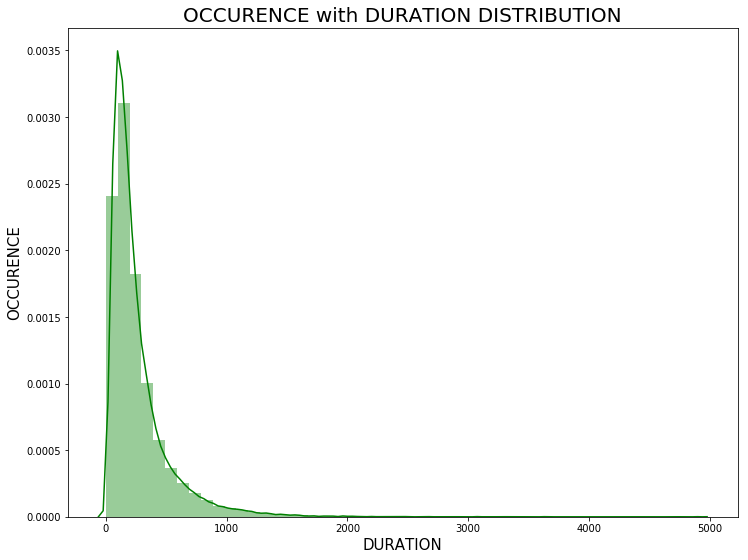

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.distplot(client_info['duration'], color='Green')
sns.despine
ax.set_xlabel('DURATION', fontsize=15)
ax.set_ylabel('OCCURENCE', fontsize=15)
ax.set_title('OCCURENCE with DURATION DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=10)

#### There is no thing we can do with call duration, the only thing we can do that improve agents' sale skill.

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Input variables:

### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')